<a href="https://colab.research.google.com/github/marcoshr/.github.io/blob/master/DS_Project_Seattle_Airbnb_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seattle Airbnb Open Data - DS Project**

This notebook is part of the Data Science Nanodegree program in Udacity.

This notebook is meant to serve as a template for future data mining processes.

## **Preliminaries**

In [ ]:
from google.colab import drive
drive.mount("/content/drive") #, force_remount=True)

!pwd
!which python
!python --version

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/usr/local/bin/python
Python 3.7.11


Questions related to business or real-world applications of how the data could be used:
- How well can we explain and predict the price?
- Correlation matrix segunda pregunta del proyecto
- c

TODO

## **Data Exploration**

### Dataset Description


Data extracted from https://www.kaggle.com/airbnb/seattle/data

Context

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

Content

The following Airbnb activity is included in this Seattle dataset:

- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

Inspiration

- Can you describe the vibe of each Seattle neighborhood using listing descriptions?
- What are the busiest times of the year to visit Seattle? By how much do prices spike?
- Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

For more ideas, visualizations of all Seattle datasets can be found [here](http://insideairbnb.com/seattle/).

Acknowledgement

This dataset is part of Airbnb Inside, and the original source can be found [here](http://insideairbnb.com/get-the-data.html).

### Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import re

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

### Reading data

In [ ]:


# df_calendar = pd.read_csv('/content/drive/MyDrive/3. Nanodegree/Data/calendar.csv')
# df_reviews = pd.read_csv('/content/drive/MyDrive/3. Nanodegree/Data/reviews.csv')

df = pd.read_csv('/content/drive/MyDrive/7. Proyectos/Data Science/Nanodegree - Udacity/Data/listings.csv')

In [ ]:
# # df_calendar
# display(df_calendar.columns)
# display(df_calendar.shape)
# display(df_calendar.head())

In [ ]:
# # df_reviews
# display(df_reviews.columns)
# display(df_reviews.shape)
# display(df_reviews.head())

In [ ]:
df.shape

(3818, 92)

In [ ]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [ ]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

## **Data Preparation**

### Missing values

In [ ]:
# Number of missing values for every column
i = 1
cutoff = 0.5 # To see all use: 0
col_len = df.shape[0]

print("Columns with >= " + str(round(cutoff*100)) + "% values missing:", end="\n\n")


for col_name in df.columns:
    
    num_missing = sum(df[col_name].isna())
    perc_missing = num_missing/col_len

    if perc_missing >= cutoff:
      print(str(i) + ". " + col_name, end="  ")
      print(str(num_missing) + "/" + str(col_len) + "  (" + str(round(perc_missing*100)) + "%)")

    i += 1

Columns with >= 50% values missing:

57. square_feet  3721/3818  (97%)
60. monthly_price  2301/3818  (60%)
61. security_deposit  1952/3818  (51%)
85. license  3818/3818  (100%)


In [ ]:
# Drop the columns with all missing values
df = df.dropna(how="all", axis=1)
df.shape

(3818, 91)

In [ ]:
# Drop the rows with missing values in response column
response_col = "price"
df = df.dropna(subset=[response_col])
df.shape   

(3818, 91)

In [ ]:
# Tranform response variable to numeric (if neceessary)
df[response_col] = df[response_col].apply(lambda value: pd.to_numeric(value.replace("$", "").replace(",", "")))
print(df[response_col])

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64


In [ ]:
# Drop columns with a single unique value including the missing values
nunique = df.nunique(dropna=False)
cols_to_drop = nunique[nunique == 1].index

print("Columns to drop: " + str(len(cols_to_drop)))
print(cols_to_drop)

df = df.drop(cols_to_drop, axis=1)
df.shape

Columns to drop: 10
Index(['scrape_id', 'last_scraped', 'experiences_offered', 'market',
       'country_code', 'country', 'has_availability', 'calendar_last_scraped',
       'requires_license', 'jurisdiction_names'],
      dtype='object')


(3818, 81)

In [ ]:
# Exploratory code to understand nunique(dropna=False) function

# # We want to remove only columns with one unique value including the missing values
# df_test = pd.DataFrame({'A': [1, 2, 3], 
#                         'B': [1, 1, 1],
#                         'C': [None, None, None], 
#                         'D': [1, 2, None],
#                         'E': [1, 1, None]})
# nunique = df_test.nunique(dropna=False)
# print(nunique)
# cols_to_drop = nunique[nunique == 1].index

# print("Columns to drop: " + str(len(cols_to_drop)))
# print(cols_to_drop)

# df_test = df_test.drop(cols_to_drop, axis=1)
# print(df_test.shape)
# df_test

### Handling categorical data

In [ ]:
# Find which columns are numeric and which categorical
print("Number of columns: " + str(df.shape[1]), end="\n\n")

print("Numerical variables: " + str(len(df.dtypes[df.dtypes != "object"])))
# print(df.dtypes[df.dtypes != "object"])
num_df = df.select_dtypes(include=['int64', 'float64'])
print(num_df.shape, end="\n\n")
num_df_cols = num_df.columns

print("Categorical variables: " + str(len(df.dtypes[df.dtypes == "object"])))
#print(df.dtypes[df.dtypes == "object"])
cat_df = df.select_dtypes(include=['object'])
print(cat_df.shape, end="\n\n")
cat_df_cols = cat_df.columns

Number of columns: 81

Numerical variables: 29
(3818, 29)

Categorical variables: 52
(3818, 52)



In [ ]:
# Count unique and missing values in categorical columns with cutoff_vc or less levels
cutoff_vc = 30
i = 1
for col_name in cat_df.columns:
  col_value_counts = cat_df[col_name].value_counts(dropna=False)

  if len(col_value_counts) <= 20:
    print(str(i) + ". ----- " + col_name + " -----")
    print(col_value_counts, end="\n\n\n")
    i += 1

1. ----- host_response_time -----
within an hour        1692
within a few hours     968
within a day           597
NaN                    523
a few days or more      38
Name: host_response_time, dtype: int64


2. ----- host_acceptance_rate -----
100%    3044
NaN      773
0%         1
Name: host_acceptance_rate, dtype: int64


3. ----- host_is_superhost -----
f      3038
t       778
NaN       2
Name: host_is_superhost, dtype: int64


4. ----- host_has_profile_pic -----
t      3809
f         7
NaN       2
Name: host_has_profile_pic, dtype: int64


5. ----- host_identity_verified -----
t      2997
f       819
NaN       2
Name: host_identity_verified, dtype: int64


6. ----- neighbourhood_group_cleansed -----
Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade        

### Normality Test

"According to the central limit theorem, the distribution of the sample mean satisfies the normal distribution when the number of samples is larger than 30 [2]. Therefore, if the number of samples is larger than 30, the analysis can be performed on the assumption that the normality is satisfied."

J Rheum Dis. 2019 Jan;26(1):5-11. English.
Published online Dec 20, 2018.  https://doi.org/10.4078/jrd.2019.26.1.5
Copyright © 2019 by The Korean College of Rheumatology

### Splitting Data

In [ ]:
# Split data into X matrix and response vector y
X = df.loc[:, df.columns != response_col]
print(X.shape)

y = df[response_col]
print(y.shape)

(3818, 80)
(3818,)


In [ ]:
def create_dummy_df(df, cat_df_cols, dummy_na, show=True):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_df_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_df_cols
            3. dummy columns for each of the categorical columns in cat_df_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''

    if show: print("Original shape: " + str(df.shape))

    # For categorical columns only
    for col_name in df[cat_df_cols]:
        
        #print(col_name)

        # Get its dummies in a df
        df_with_dummies = pd.get_dummies(df[col_name], dummy_na=dummy_na, prefix=col_name, drop_first=True)
        
        # Attached df_with_dummies to original and store them at the end
        df = df.join(df_with_dummies, lsuffix=col_name)

        # Remove all the original columns in cat_df_cols
        del df[col_name]
    
    #print(df.columns)
    if show: print("Final shape: " + str(df.shape))
    
    return df

In [ ]:
# Override X with dummies for categorical variables
X = create_dummy_df(X, X.columns, dummy_na=True)

Original shape: (3818, 80)
Final shape: (3818, 76075)


In [ ]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
# Impute the mean of the column for any missing values in numerical columns
X_train = X_train.apply(lambda col: col.fillna(col.mean()))

## **Modelling**

Simplistic base models are included in order to compare relative metrics in result.

In [ ]:
# TODO: Dividir todo modelling en instantiate, fit, predict, evaluate. Todos los modelos juntos

### Previous Value Model

In [ ]:
# If time series, a model that always predicts the previous value

### Mean Model

In [ ]:
y_pred_mean_model = y_test.copy()
y_pred_mean_model



2562     55.0
1425     82.0
2186     68.0
3494     58.0
3046    130.0
        ...  
282     149.0
1736    240.0
1200    172.0
1288    300.0
3622    135.0
Name: price, Length: 1146, dtype: float64

In [ ]:
y_train

1187     75.0
859      67.0
533     300.0
3105     62.0
2761    125.0
        ...  
1130     55.0
1294    110.0
860      58.0
3507     95.0
3174    103.0
Name: price, Length: 2672, dtype: float64

In [ ]:
type(y_pred_mean_model)

list

In [ ]:
# The prediction of the response variable is the simple average

y_train_mean = np.mean(y_train)
y_test_length = len(y_test)

print("y_train mean:", y_train_mean)
print("y_test length:", y_test_length)
print()

y_pred_mean_model = pd.Series([y_train_mean]).repeat(y_test_length)

print(type(y_pred_mean_model))
print()

y_pred_mean_model

y_train mean: 127.2997754491018
y_test length: 1146

<class 'pandas.core.series.Series'>



0    127.299775
0    127.299775
0    127.299775
0    127.299775
0    127.299775
        ...    
0    127.299775
0    127.299775
0    127.299775
0    127.299775
0    127.299775
Length: 1146, dtype: float64

### Linear Regression Model

In [ ]:
# Instantiate a LinearRegression model with normalized data
lm_model = LinearRegression(normalize=True)

In [ ]:
# Fit the model to the training data
lm_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
# Predict the response for the test data
y_pred_lm_model = lm_model.predict(X_test)

### Random Forest Model

In [ ]:
# Instantiate the model
rf_model = RandomForestClassifier(random_state=42, verbose=1)

In [ ]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   44.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [ ]:
# Predict the response for the test data
y_pred_rf_model = rf_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


### XGBoost Model

In [ ]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

# scores = XGBRegressor(objective='reg:squarederror'), X, y, scoring='neg_mean_squared_error', random_state =42)

In [ ]:
# Instantiate the model
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)

In [ ]:
# Necessary for model fitting and prediction
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [ ]:
# Fit the model to the training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
# Predict the response for the test data
y_pred_xgb_model = xgb_model.predict(X_test)

## **Evaluation**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Get results from the model predictions (R-squared, RMSE and MAPE)
models = ["mean_model", "lm_model", "rf_model", "xgb_model"]
metrics = ["r2", "rmse", "mape"]

eval_metrics = {
    "r2": [r2_score(y_test, y_pred_mean_model),
           r2_score(y_test, y_pred_lm_model),
           r2_score(y_test, y_pred_rf_model),
           r2_score(y_test, y_pred_xgb_model)],

    "rmse": [mean_squared_error(y_test, y_pred_mean_model, squared=False),
             mean_squared_error(y_test, y_pred_lm_model, squared=False),
             mean_squared_error(y_test, y_pred_rf_model, squared=False),
             mean_squared_error(y_test, y_pred_xgb_model, squared=False)],

    "mape": [mean_absolute_percentage_error(y_test, y_pred_mean_model),
             mean_absolute_percentage_error(y_test, y_pred_lm_model),
             mean_absolute_percentage_error(y_test, y_pred_rf_model),
             mean_absolute_percentage_error(y_test, y_pred_xgb_model)]
}

In [ ]:
eval_metrics

{'mape': [49.76444170482612,
  43.94209838506009,
  27.585545552118766,
  30.293191239609552],
 'r2': [-0.000592984421295295,
  0.3320476124815085,
  0.40629910739596753,
  0.5725877910019812],
 'rmse': [92.56687926917432,
  75.63096626326954,
  71.30348334039996,
  60.49930108601253]}

In [ ]:
# TODO: cambiar filas por columnas

print("{:<10} {:<10} {:<10} {:<10} {:<10}".format('Metrics', 'mean_model', 'lm_model', 'rf_model', 'xgb_model'))

for k, v in eval_metrics.items():
  a, b, c, d = v
  print("{:<10} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(k, a, b, c, d))

Metrics    mean_model lm_model   rf_model   xgb_model 
r2         -0.00      0.33       0.41       0.57      
rmse       92.57      75.63      71.30      60.50     
mape       49.76      43.94      27.59      30.29     


## **Visualization**

KeyError: ignored

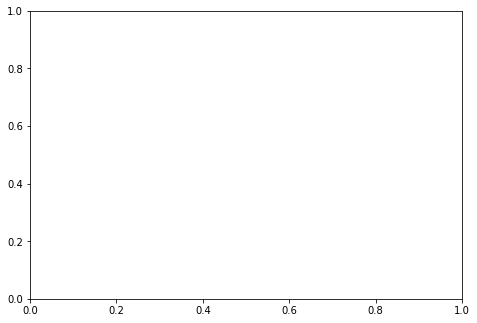

In [ ]:
# Plot evaluation metrics

# TODO: grid, bar charts

for model in models:
  fig = plt.figure()
  axes = fig.add_axes([0,0,1,1])
  values = eval_metrics[i]
  axes.bar(models, values)
  plt.title(model)
  plt.show()

  i+=1

# plt.plot(eval_metrics["r2"], 'ro')
# plt.show()

## **End**

### Links
- [Github repository](www.link.com)
- [Medium blog post](www.link.com)
- [Linkedin account](https://www.linkedin.com/in/marcos-hern%C3%A1ndez-rodr%C3%ADguez/?locale=en_US)

### Udacity Project Specification

- Code Functionality and Readability
 - [ ] Code is functional
 - [ ] Code is readable (uses good coding practices - PEP8)
- Code Functionality and Readability
 - [ ] aaa
 - [ ] bbb

### Project checklist
- [ ] Provide insight into the methods you chose and why you chose them
- [ ] Revisar pagina de udacity requerimientos del proyecto
- [ ] remove missing values
- [ ] divide train test
- [ ] mejorar data exploration
- [ ] escribir las preguntas
- [ ] Check for outliers
- [ ] instantiate model
- [ ] train model
- [ ] predict
- [ ] get scores
- [ ] visualize results
- [ ] Submit as response to dataset task in kaggle
- [ ] Cross validation in all models

TODO:  
Random model para reg y clasif  
Empezar medium from notebook  
Correlation matrix pregunta entre varios  
prueba

**[*Marcos Hernández Rodríguez*](https://www.linkedin.com/in/marcos-hern%C3%A1ndez-rodr%C3%ADguez/)  
*Canary Islands, Spain  
2021***